<a href="https://colab.research.google.com/github/sancarhacer/MachineLearning/blob/main/PolynomialRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline

In [125]:
df = pd.read_csv("3-customersatisfaction.csv")


### Basic Data Info


In [126]:
df.head()

,Unnamed: 0,Customer Satisfaction,Incentive
0,0,-1.282447,1.010513
1,1,0.425298,2.281043
2,2,1.953070,4.415053
3,3,2.625838,10.563600
4,4,-1.426333,0.627365


In [127]:
df.drop("Unnamed: 0", axis = 1, inplace=True)
df.head()

,Customer Satisfaction,Incentive
0,-1.282447,1.010513
1,0.425298,2.281043
2,1.953070,4.415053
3,2.625838,10.563600
4,-1.426333,0.627365


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Satisfaction  100 non-null    float64
 1   Incentive              100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


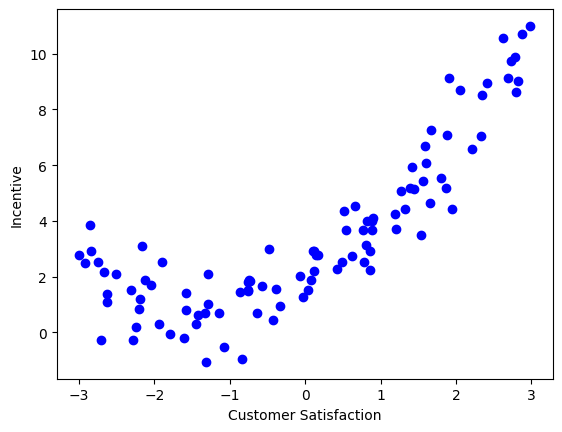

In [129]:
plt.scatter(df["Customer Satisfaction"],df["Incentive"], color="b")
plt.xlabel("Customer Satisfaction")
plt.ylabel("Incentive")
plt.show()

### Exploratory Data Analysis (EDA)

### Define Features and Target
dependent & independent features

In [130]:
# dependent & independent features
X = df[["Customer Satisfaction"]]
y = df["Incentive"]

### Train-Test Split

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

### Feature Scaling

In [132]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Linear Regression Model

In [133]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [134]:
y_pred = regression.predict(X_test)

In [135]:
y_test,y_pred

(84    2.530617
 36    2.762112
 57    2.107457
 51    9.121321
 46    1.267276
 78    3.505391
 93    3.127018
 14    1.860176
 11    5.135536
 59    1.504610
 61    4.525115
 38    3.986396
 21    0.679229
 90    0.837926
 8     3.713282
 25    1.886681
 63    2.483237
 9     1.090139
 94    1.510192
 97    0.786207
 Name: Incentive, dtype: float64,
 array([ 4.65663741,  3.71913877,  1.64121789,  6.29646523,  3.46766736,
         5.7580845 ,  4.692485  ,  3.61616231,  5.62448003,  0.13472702,
         4.47909659,  4.8130839 ,  1.58319087,  0.30515983,  5.27634309,
         0.41711005, -0.7385295 , -0.32653914,  3.55906887,  1.19798631]))

### Performance Metrics

In [136]:
score = r2_score(y_test, y_pred)
print("score: ",score)

score:  0.2705652535622246


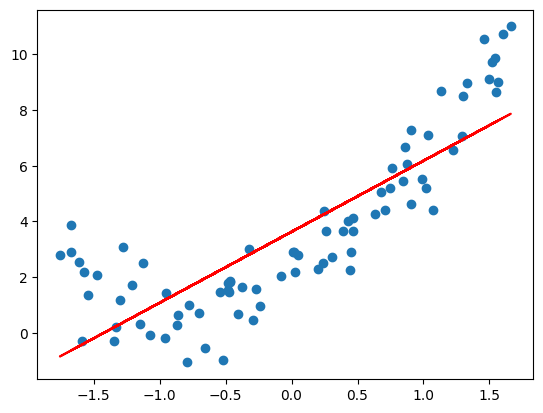

In [137]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train), color = "r")
plt.show()

### Feature Scaling for Polynomial

In [138]:
poly = PolynomialFeatures(degree=2, include_bias=True)

In [139]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

### Linear Regression Model
for x train polynomial

In [140]:
regression = LinearRegression()
regression.fit(X_train_poly, y_train)

LinearRegression()

In [141]:
y_pred = regression.predict(X_test_poly)


### Performance Metric

In [142]:
score = r2_score(y_test, y_pred)
print(score)

0.7685687698788557


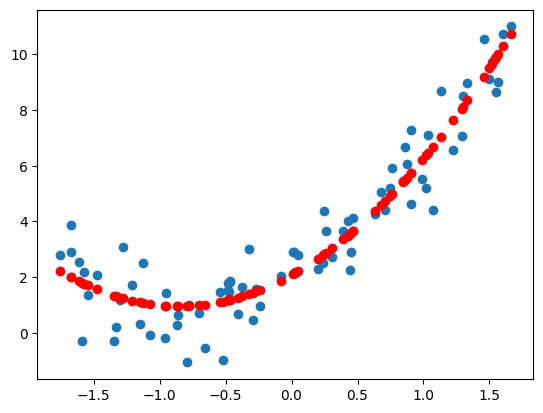

In [143]:
plt.scatter(X_train, y_train)
plt.scatter(X_train, regression.predict(X_train_poly), color = "r")
plt.show()

### Feature Scaling
for Polynomial degree 3

In [144]:
poly = PolynomialFeatures(degree=3, include_bias=True)

In [145]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

### Linear Regression Model
for x train polynomial

In [146]:
regression = LinearRegression()
regression.fit(X_train_poly, y_train)

LinearRegression()

In [147]:
y_pred = regression.predict(X_test_poly)


### Performance Metric

In [148]:
score = r2_score(y_test, y_pred)
print(score)

0.757344362140105


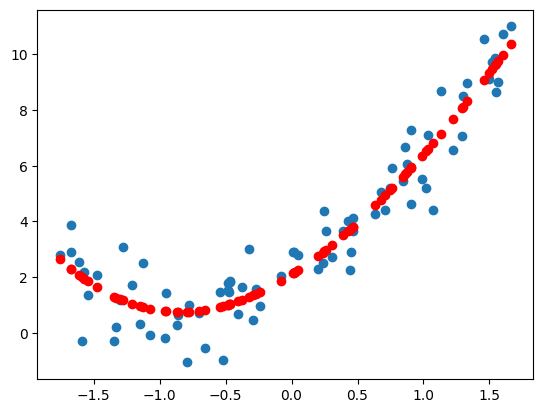

In [149]:
plt.scatter(X_train, y_train)
plt.scatter(X_train, regression.predict(X_train_poly), color = "r")
plt.show()

In [150]:
# new data
new_df = pd.read_csv("3-newdatas.csv")
new_df.head()

,0
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397


In [151]:
new_df.rename(columns = {"0": "Customer Satisfaction"}, inplace=True)
new_df.head()

,Customer Satisfaction
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397


In [152]:
X_new = new_df[["Customer Satisfaction"]]
X_new.head()

,Customer Satisfaction
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397


In [153]:
X_new = scaler.transform(X_new)
X_new_poly = poly.transform(X_new)
y_new_predict_poly = regression.predict(X_new_poly)

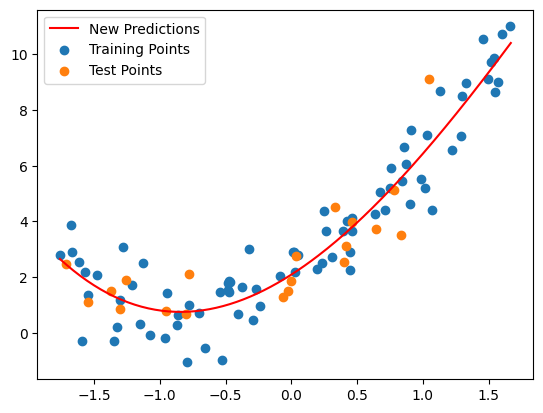

In [154]:
plt.plot(X_new, y_new_predict_poly , "r", label="New Predictions")
plt.scatter(X_train, y_train, label="Training Points")
plt.scatter(X_test, y_test, label="Test Points")
plt.legend()
plt.show()

###pipeline

In [155]:

def poly_regression(degree):
    poly_features = PolynomialFeatures(degree=degree)
    lin_reg = LinearRegression()
    scaler = StandardScaler()
    pipeline = Pipeline([
        ("standard_scaler", scaler),
        ("poly_features", poly_features),
        ("lin_reg", lin_reg)
    ])
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)
    print("R2 score: ", score)

    y_pred_new = pipeline.predict(X_new)
    plt.plot(X_new, y_pred_new, "r", label="New Predictions")
    plt.scatter(X_train, y_train, label="Training Points")
    plt.scatter(X_test, y_test, label="Test Points")
    plt.legend()
    plt.show()

R2 score:  0.2705652535622246


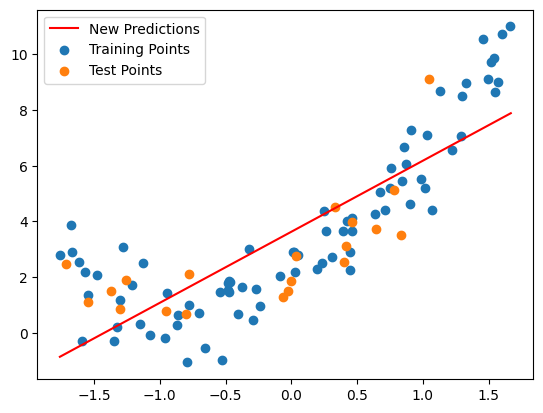

R2 score:  0.7685687698788557


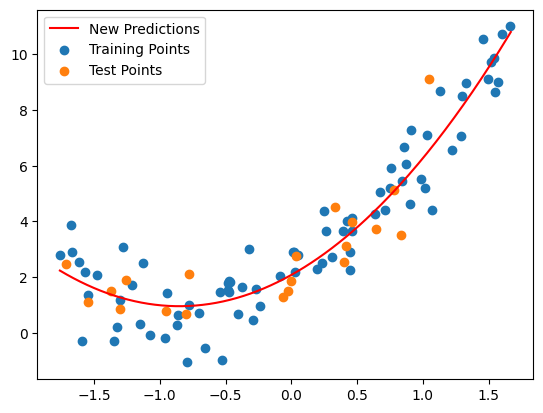

R2 score:  0.7573443621401048


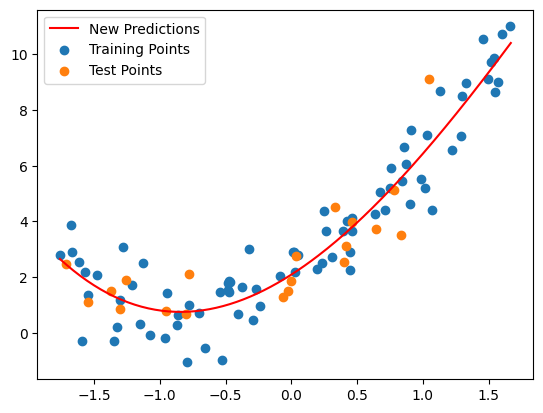

R2 score:  0.7355034443260413


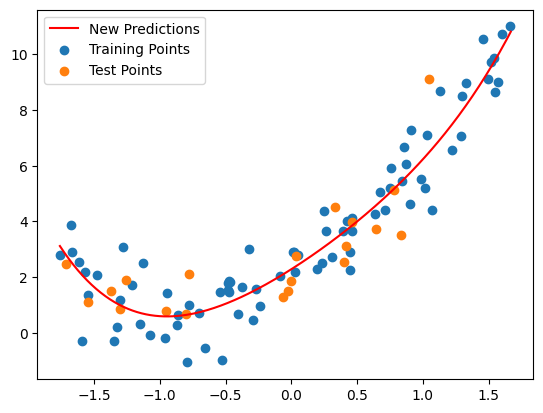

R2 score:  0.73512441650954


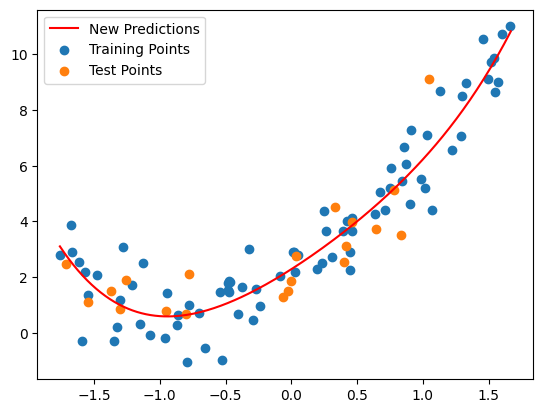

R2 score:  0.7343590482133435


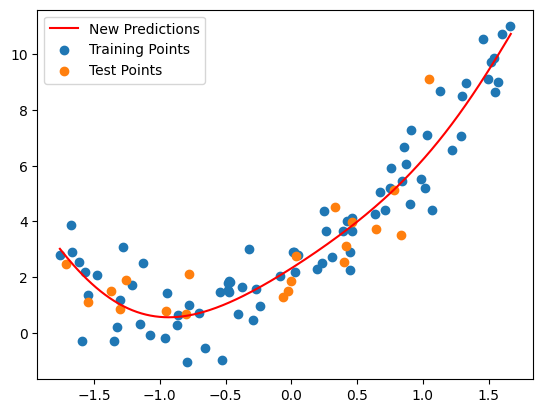

R2 score:  0.7347819263549452


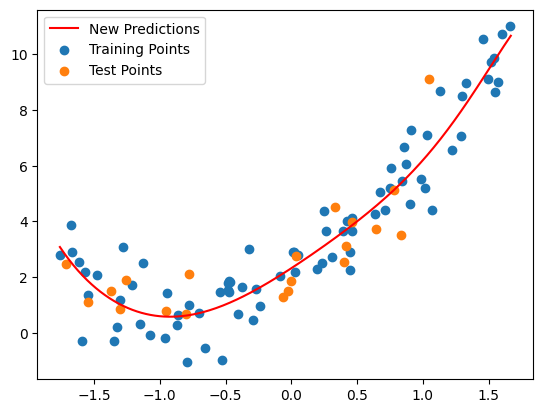

In [157]:
for degree in [1,2,3,4,5,6,7]:
    poly_regression(degree)